## MAJOR PROJECT - ML072B3
#### PROBLEM STATEMENT : From the given data, predict whether the patient has 10-year risk of future coronary heart disease (CHD).
##### Raghavendra K

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Look for number of rows and columns in the dataet
df.shape

(4240, 16)

In [4]:
# Datatype of each column
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
# Basic Statistical constants of each column
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Null Value Imputation:

In [6]:
df.isna().sum()
null = df[df.isna().any(axis=1)]
null.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0


In [7]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
# Filling the null values or removing them:

df['cigsPerDay']=df['cigsPerDay'].fillna(1)
df['BPMeds']=df['BPMeds'].fillna(1)
df['glucose']=df['glucose'].fillna(method='bfill',axis=0)
df['BMI']=df['BMI'].fillna(method='bfill',axis=0)
df['BMI']=df['BMI'].fillna(method='bfill',axis=0)
df['totChol']=df['totChol'].fillna(method='ffill',axis=0)
df['heartRate']=df['heartRate'].fillna(method='ffill',axis=0)
df2=df.dropna()
df2.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
df2.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000
mean,0.427328,49.552358,1.979444,0.494800,8.980411,0.042080,0.006046,0.311245,0.025635,236.660218,132.369287,82.876663,25.778525,75.920435,82.016445,0.151874
std,0.494750,8.562421,1.019791,0.500033,11.905646,0.200796,0.077530,0.463059,0.158062,44.190547,22.075401,11.952176,4.078006,12.047869,23.799522,0.358942
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.750000,89.500000,27.990000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Exploratory Data Analysis - EDA :

pdf= [0.50589623 0.         0.         0.         0.         0.
 0.         0.         0.         0.49410377]
bin_edges= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
cdf= [0.50589623 0.50589623 0.50589623 0.50589623 0.50589623 0.50589623
 0.50589623 0.50589623 0.50589623 1.        ]


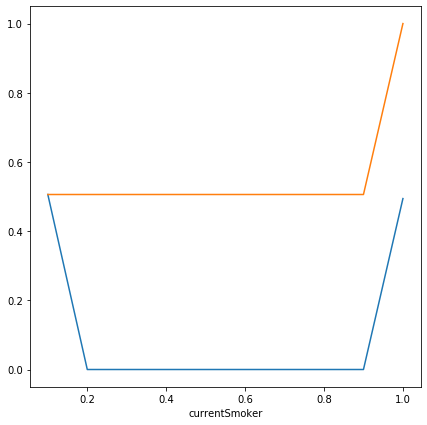

In [17]:
#cdf and pdf
plt.rcParams["figure.figsize"] = 7,7
counts, bin_edges = np.histogram(df['currentSmoker'], bins=10,density = True)
plt.xlabel('currentSmoker')
pdf = counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
cdf = np.cumsum(pdf)
print("cdf=",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

pdf= [5.91273585e-01 7.24056604e-02 2.27830189e-01 1.43867925e-02
 5.16509434e-02 2.42924528e-02 1.39150943e-02 1.41509434e-03
 2.59433962e-03 2.35849057e-04]
bin_edges= [ 0.  7. 14. 21. 28. 35. 42. 49. 56. 63. 70.]
cdf= [0.59127358 0.66367925 0.89150943 0.90589623 0.95754717 0.98183962
 0.99575472 0.99716981 0.99976415 1.        ]


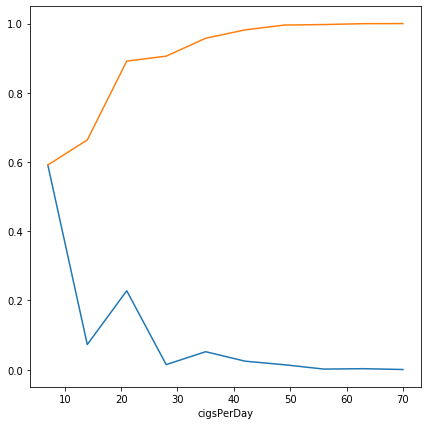

In [18]:
counts, bin_edges = np.histogram(df['cigsPerDay'], bins=10,density = True)
plt.xlabel('cigsPerDay')
pdf = counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
cdf = np.cumsum(pdf)
print("cdf=",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

0    4029
1     106
Name: diabetes, dtype: int64

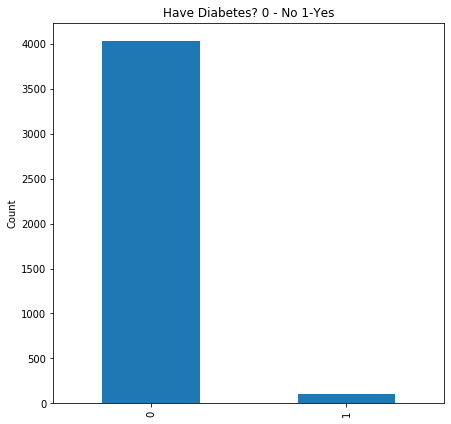

In [19]:
## Diabetes : 
df2.diabetes.value_counts().plot(kind="bar")
plt.title("Have Diabetes? 0 - No 1-Yes")
plt.ylabel("Count")
df2.diabetes.value_counts()

0    2089
1    2046
Name: currentSmoker, dtype: int64

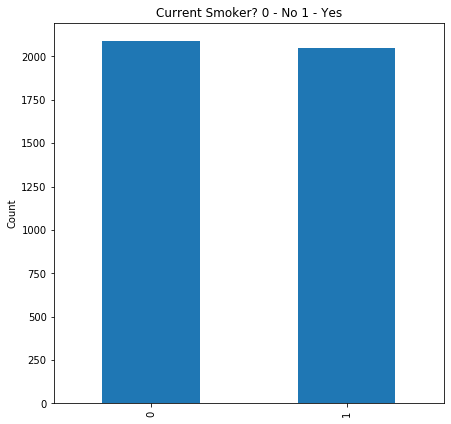

In [20]:
df2.currentSmoker.value_counts().plot(kind="bar")
plt.title("Current Smoker? 0 - No 1 - Yes")
plt.ylabel("Count")
df2.currentSmoker.value_counts()

0.0     2089
20.0     720
30.0     214
15.0     207
10.0     140
9.0      125
5.0      117
3.0       98
1.0       92
40.0      78
43.0      56
25.0      51
35.0      22
6.0       18
2.0       17
7.0       12
8.0       11
60.0      10
18.0       8
4.0        8
17.0       7
50.0       6
11.0       5
23.0       5
45.0       3
16.0       3
13.0       3
12.0       3
14.0       2
19.0       2
70.0       1
38.0       1
29.0       1
Name: cigsPerDay, dtype: int64

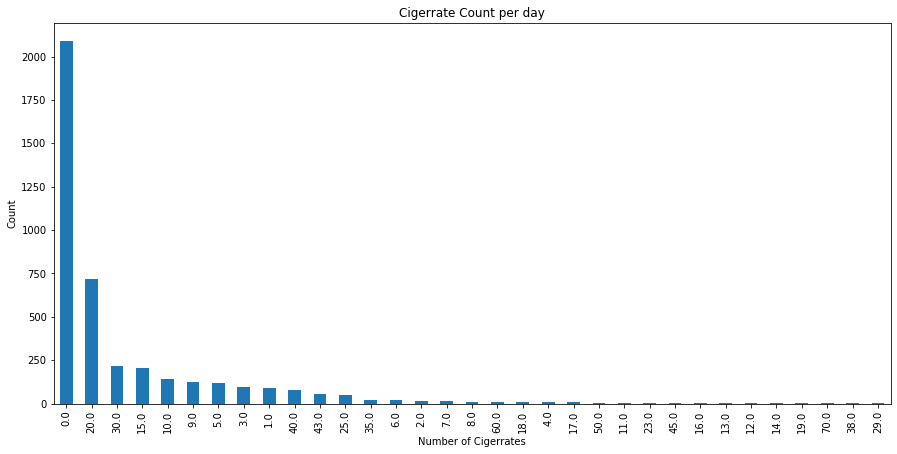

In [22]:
plt.rcParams["figure.figsize"] = 15,7
df2.cigsPerDay.value_counts().plot(kind="bar")
plt.xlabel("Number of Cigerrates")
plt.ylabel("Count")
plt.title("Cigerrate Count per day")
df2.cigsPerDay.value_counts()

0    4110
1      25
Name: prevalentStroke, dtype: int64

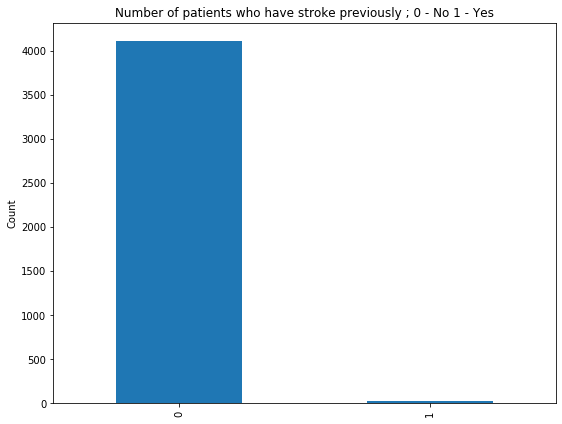

In [23]:
plt.rcParams["figure.figsize"] = 9,7
df2.prevalentStroke.value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.title("Number of patients who have stroke previously ; 0 - No 1 - Yes")
df2.prevalentStroke.value_counts()

0    3507
1     628
Name: TenYearCHD, dtype: int64

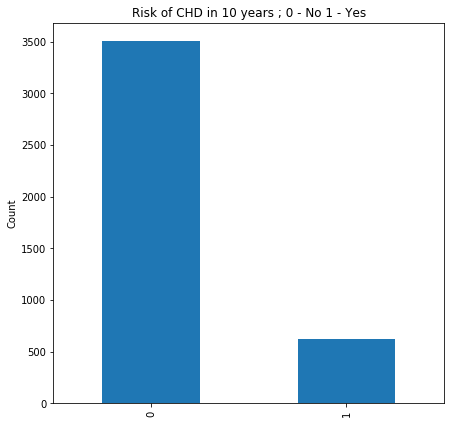

In [24]:
plt.rcParams["figure.figsize"] = 7,7
df2.TenYearCHD.value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.title("Risk of CHD in 10 years ; 0 - No 1 - Yes")
df2.TenYearCHD.value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

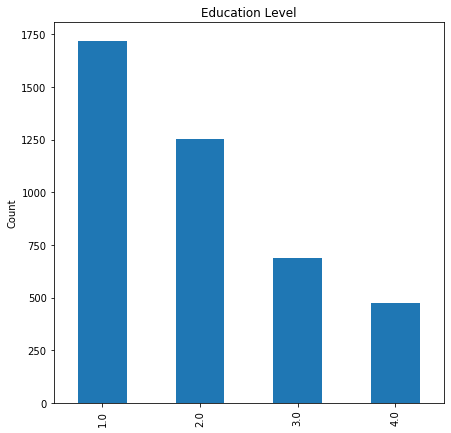

In [27]:
df2.education.value_counts().plot(kind="bar")
plt.title("Education Level")
plt.ylabel("Count")
df2.education.value_counts()

0    2368
1    1767
Name: male, dtype: int64

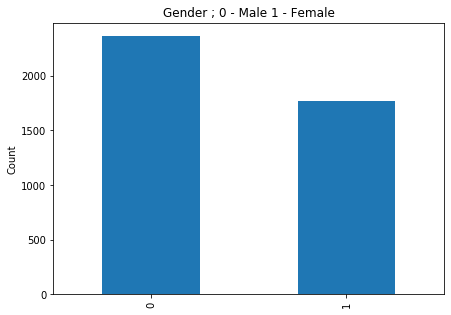

In [28]:
plt.rcParams["figure.figsize"] = 7,5
df2.male.value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.title("Gender ; 0 - Male 1 - Female")
df2.male.value_counts()

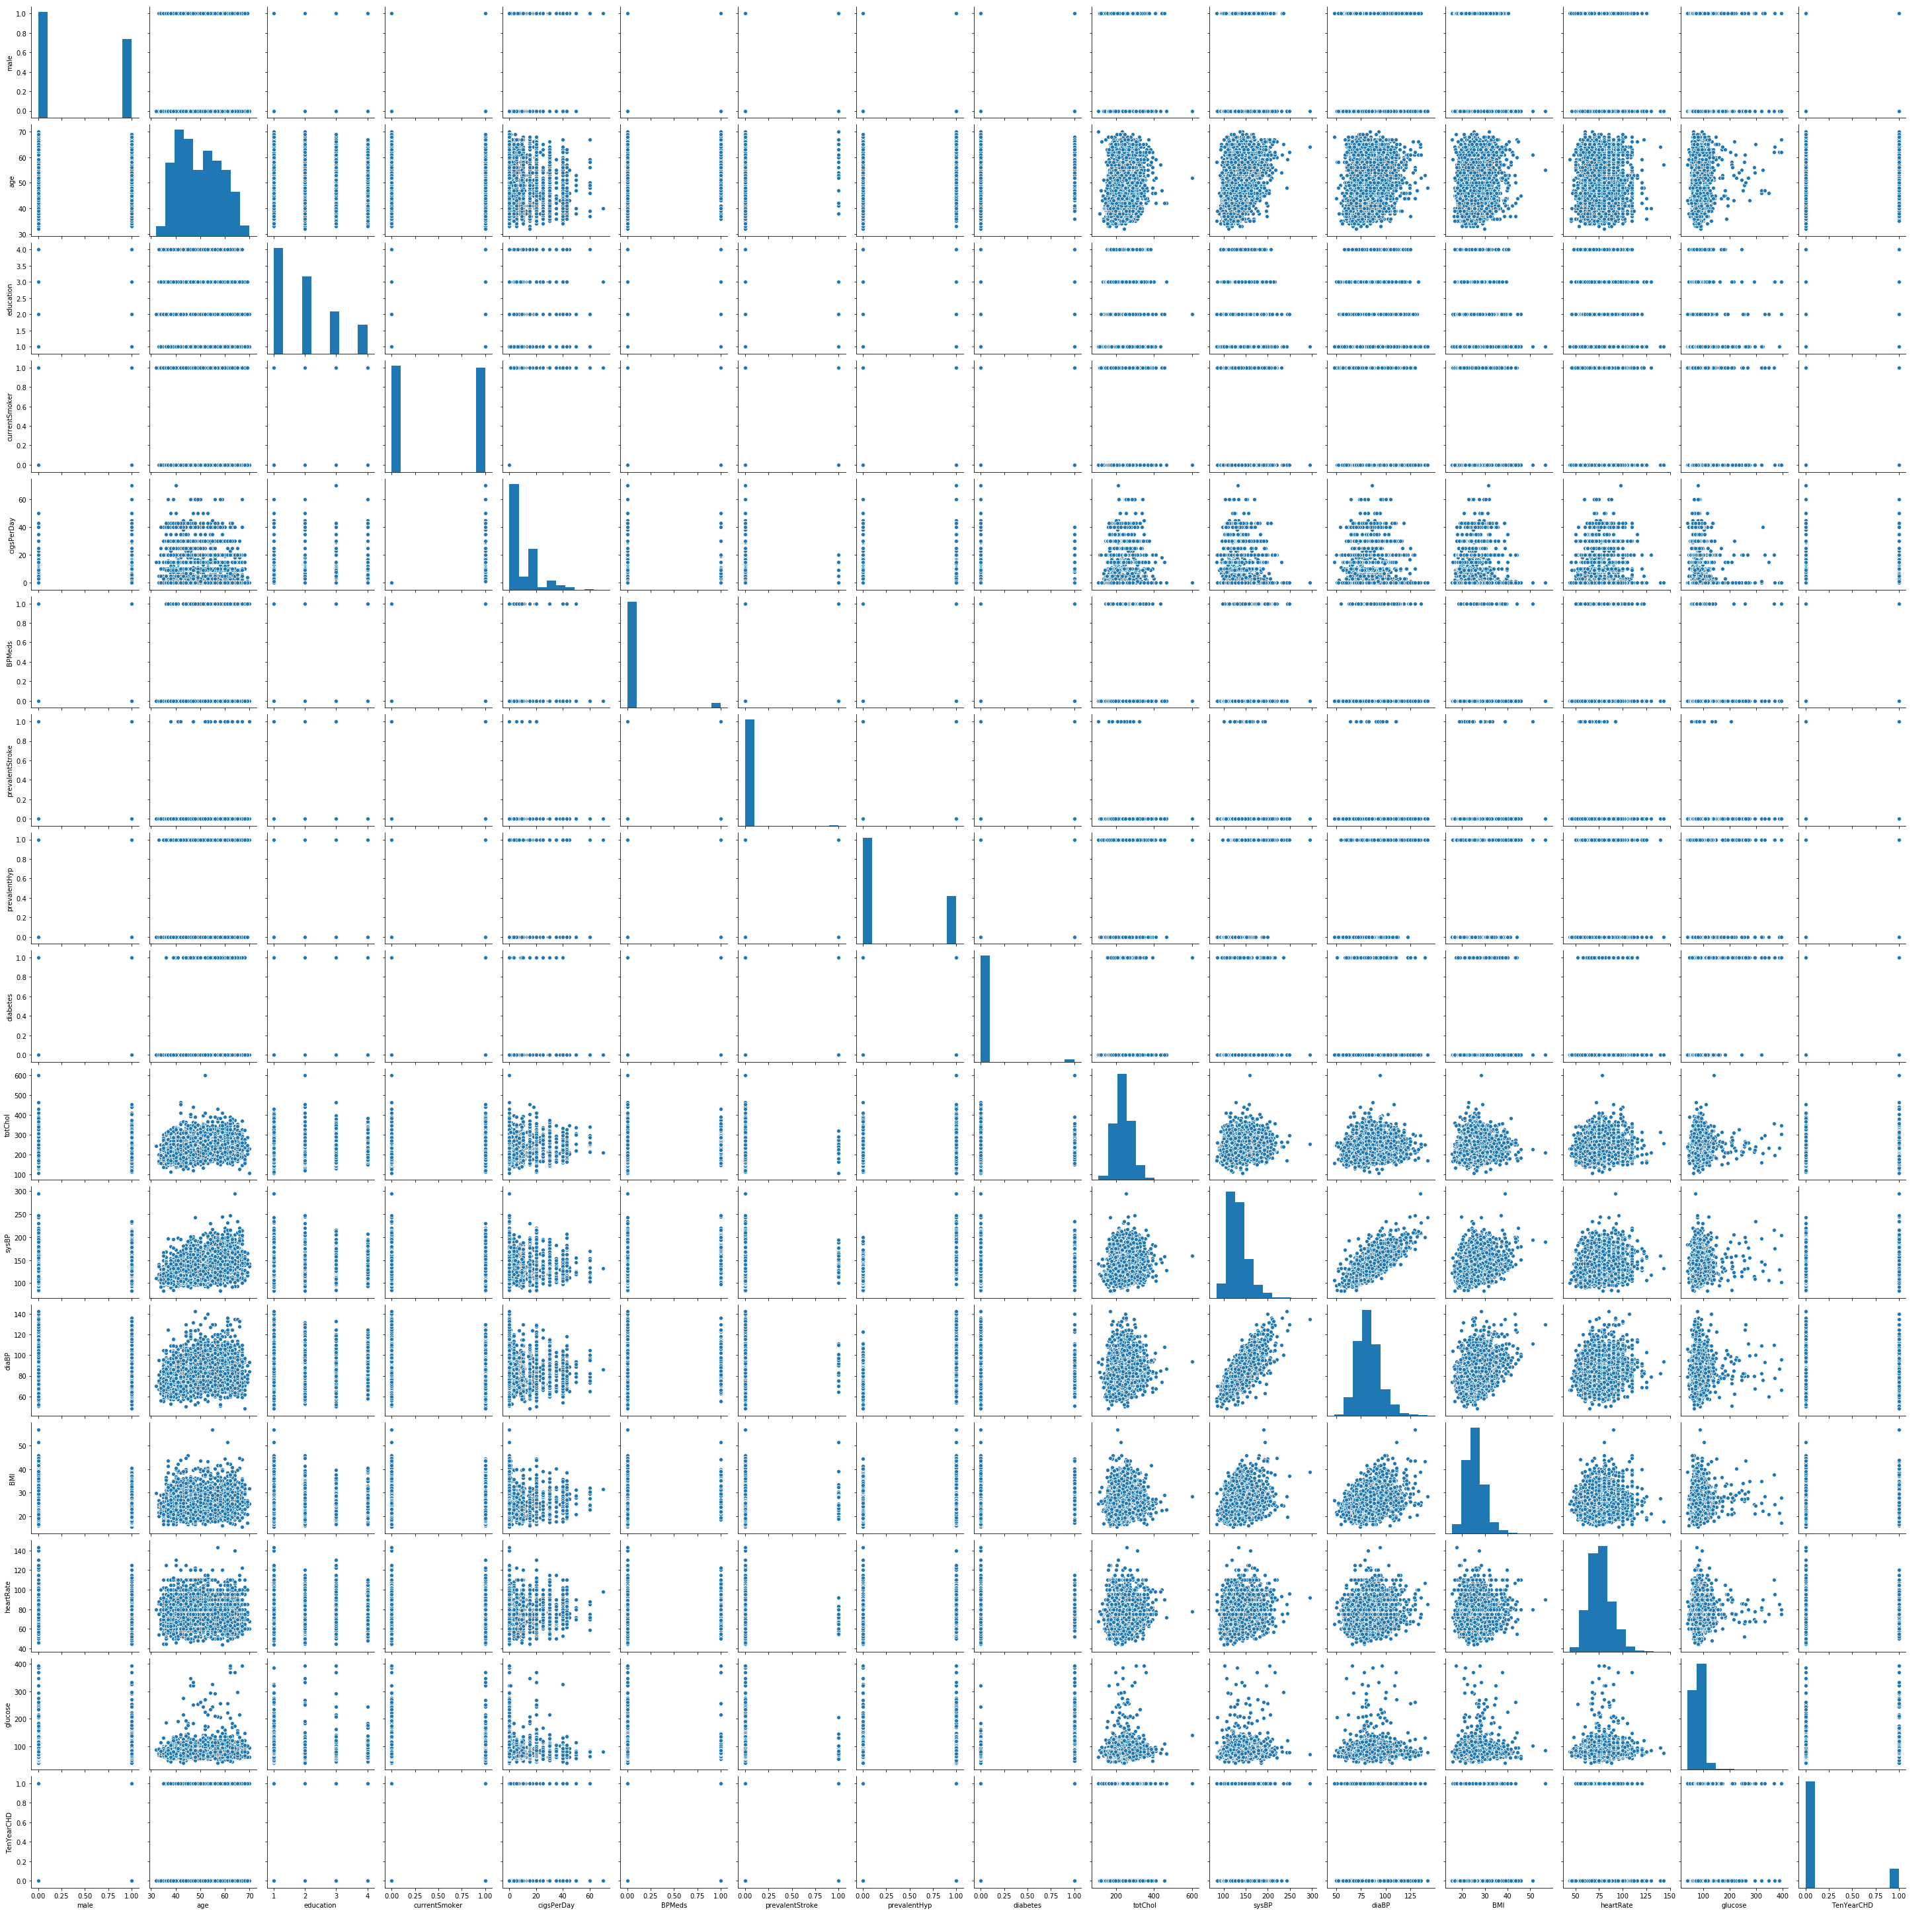

In [85]:
### Bivariate Analysis : 

sns.pairplot(df2)

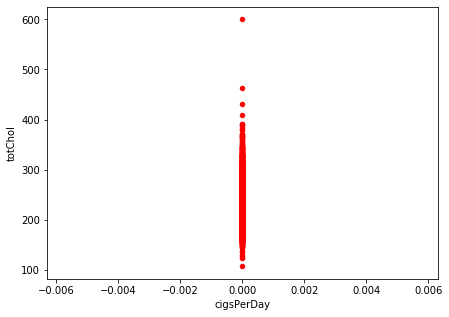

In [29]:
project=df2
plt.rcParams["figure.figsize"] = 7,5
project[project['currentSmoker']==0].plot.scatter(x="cigsPerDay",y="totChol",color='r')

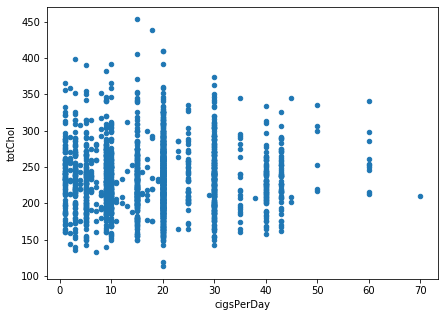

In [30]:
project[project['currentSmoker']==1].plot.scatter(x="cigsPerDay",y="totChol")

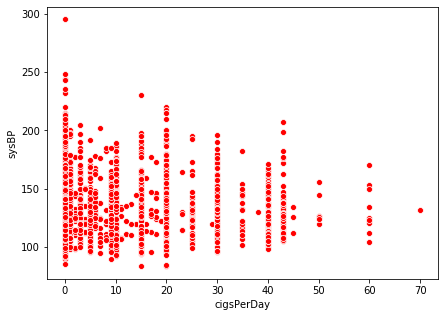

In [31]:
sns.scatterplot(x="cigsPerDay",y="sysBP",data=project,color='r',legend='full')

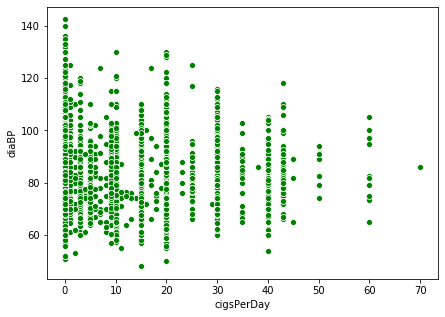

In [32]:
sns.scatterplot(x="cigsPerDay",y="diaBP",data=project,color='g',legend='full')

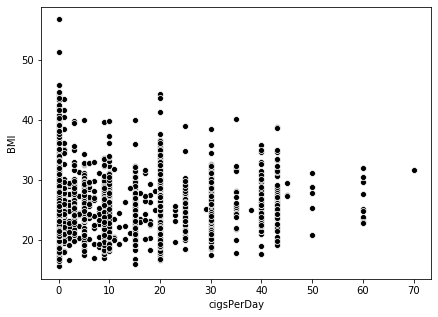

In [33]:
sns.scatterplot(x="cigsPerDay",y="BMI",data=project,color='k',legend='full')

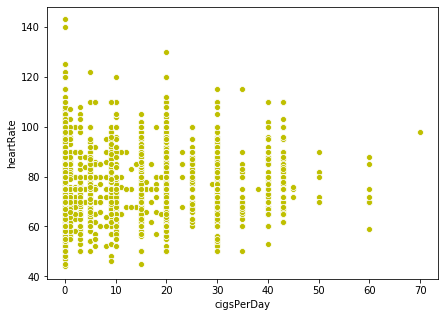

In [34]:
sns.scatterplot(x="cigsPerDay",y="heartRate",data=project,color='y',legend='full')

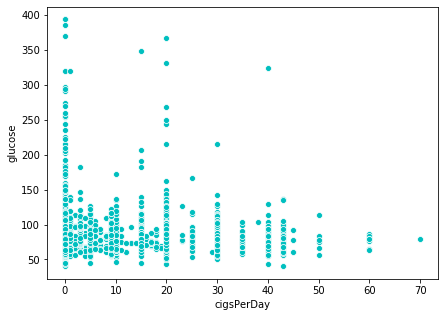

In [35]:
sns.scatterplot(x="cigsPerDay",y="glucose",data=project,color='c',legend='full')

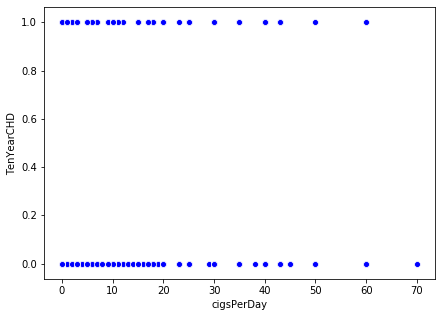

In [36]:
sns.scatterplot(x="cigsPerDay",y="TenYearCHD",data=project,color='b',legend='full')

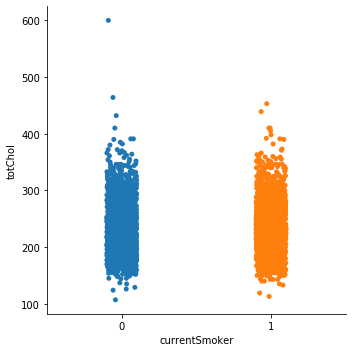

In [37]:
sns.catplot(x="currentSmoker",y="totChol",data=project)

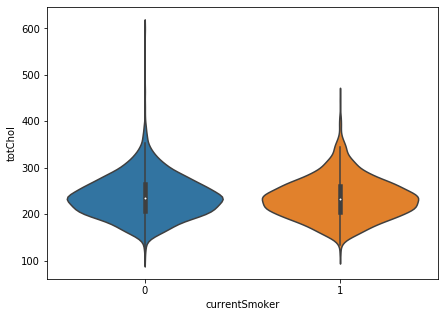

In [38]:
sns.violinplot(x='currentSmoker',y='totChol',data=project)

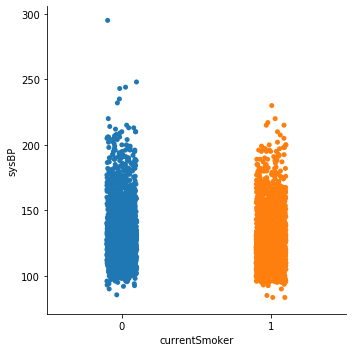

In [39]:
sns.catplot(x="currentSmoker",y="sysBP",data=project)

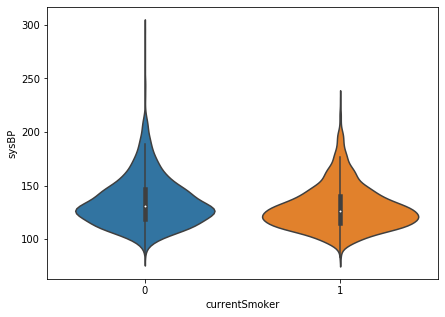

In [40]:
sns.violinplot(x='currentSmoker',y='sysBP',data=project)

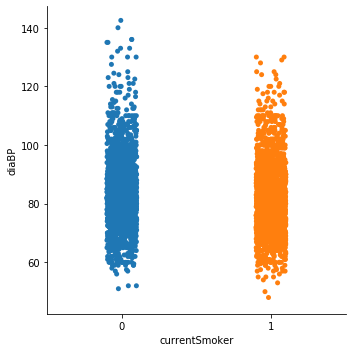

In [41]:
sns.catplot(x="currentSmoker",y="diaBP",data=project)

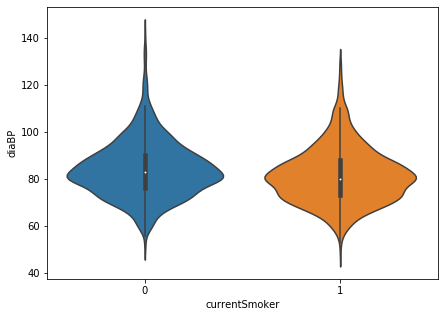

In [42]:
sns.violinplot(x='currentSmoker',y='diaBP',data=project)

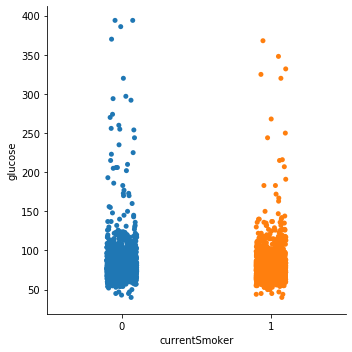

In [43]:
sns.catplot(x="currentSmoker",y="glucose",data=project)

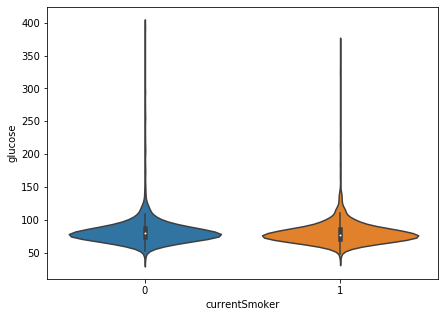

In [44]:
sns.violinplot(x='currentSmoker',y='glucose',data=project)

## OBSERVATION

-By plotting wrt to number of cigarettes per day and how it affects the health issues we are not able to find any concrete relevence.
- Total Cholestrol(totChol)- many non smokers lie between 100 to 400 chol while smokers lie between the same 100 to 400 when they smoke 10 to 70 cigarettes per day. This implies that tot chol is not dependent on the number of cigarettes entirely. it depends on how the person maintains his fat consumption and his exercise. In the nonsmoker case we have one person having a total chol at 600 and a smoker having chol at 700. This can state that they are obese.

- In the sysBP section we can see that a non smoker group has sysBP till 250while a smoker has comparitively lesser amount. We all know that smoking causes acute increase of BP and sometimes low bp too. we can say here for the fact that smokers have comparitively lower amount of BP than non smokers. Same can be said for diaBP too.

- People who are smokers and non smokers have similar heart rate although people who smoke more than 50 cigs a day have a decrease in their heart rate. The non smokers have a perfectly healthy heartrate.

- The glucose amount in non smokers are alot. when it comes to smokers their glucose amount is limitted to 150 which is normal. Certain non smokers have glucose level upto 400 stating they are having sugar problems.

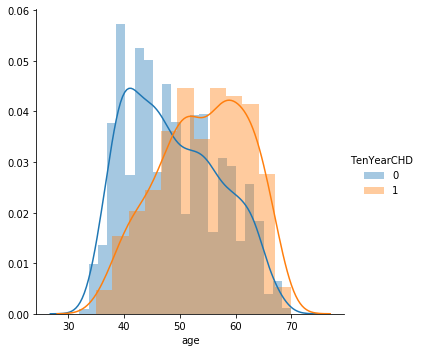

In [45]:
sns.FacetGrid(df,hue = "TenYearCHD",height = 5).map(sns.distplot,"age").add_legend()

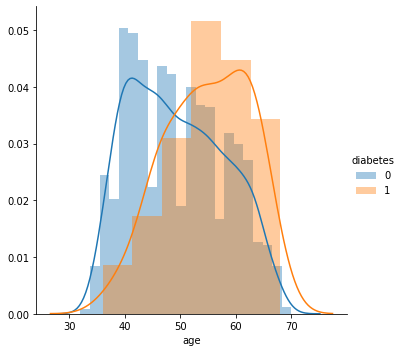

In [46]:
sns.FacetGrid(df,hue = "diabetes",height = 5).map(sns.distplot,"age").add_legend()

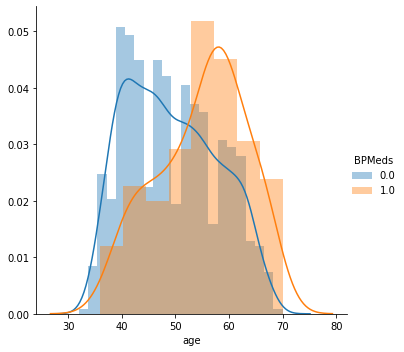

In [47]:
# distribution plot
sns.FacetGrid(df,hue = "BPMeds",height = 5).map(sns.distplot,"age").add_legend()

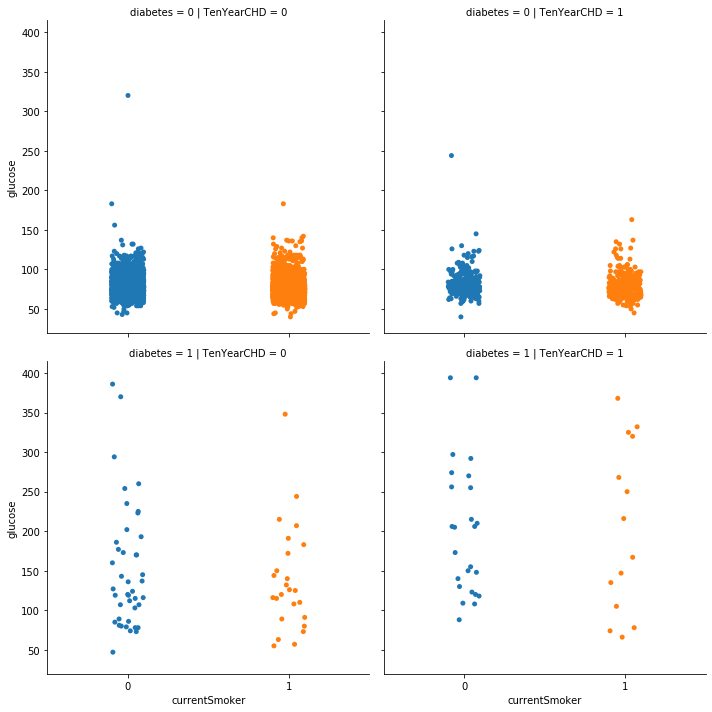

In [48]:
## MUltivariate 

sns.catplot(y="glucose",x="currentSmoker",data=df2,col="TenYearCHD",row='diabetes')

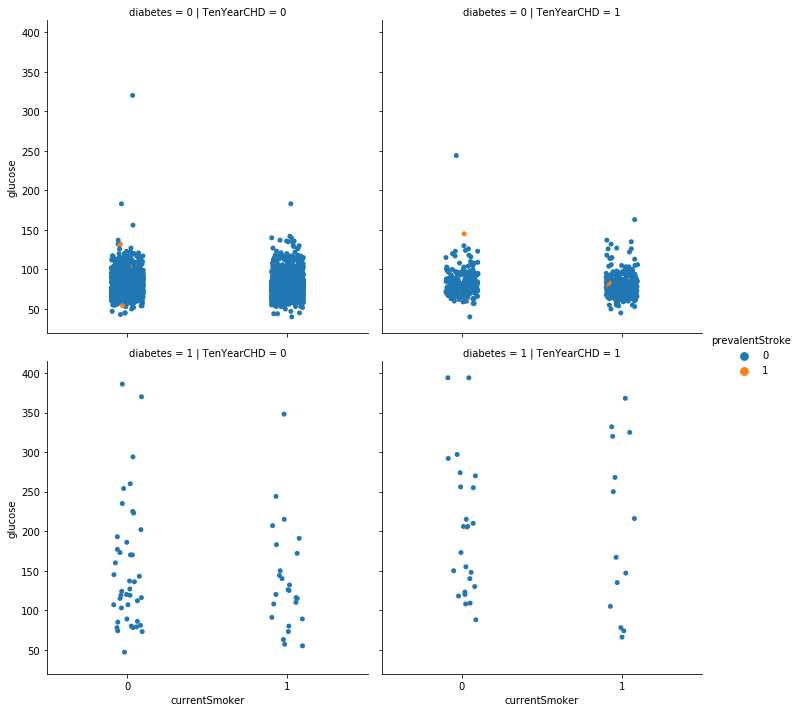

In [49]:
## MUltivariate 

sns.catplot(y="glucose",x="currentSmoker",data=df2,col="TenYearCHD",row='diabetes',hue='prevalentStroke')

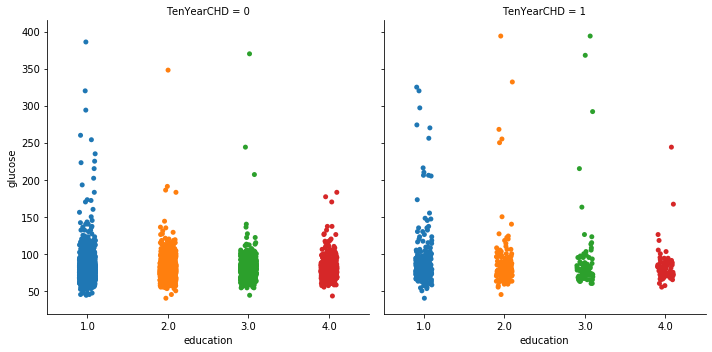

In [50]:
## MUltivariate 

sns.catplot(y="glucose",x="education",data=df2,col="TenYearCHD")

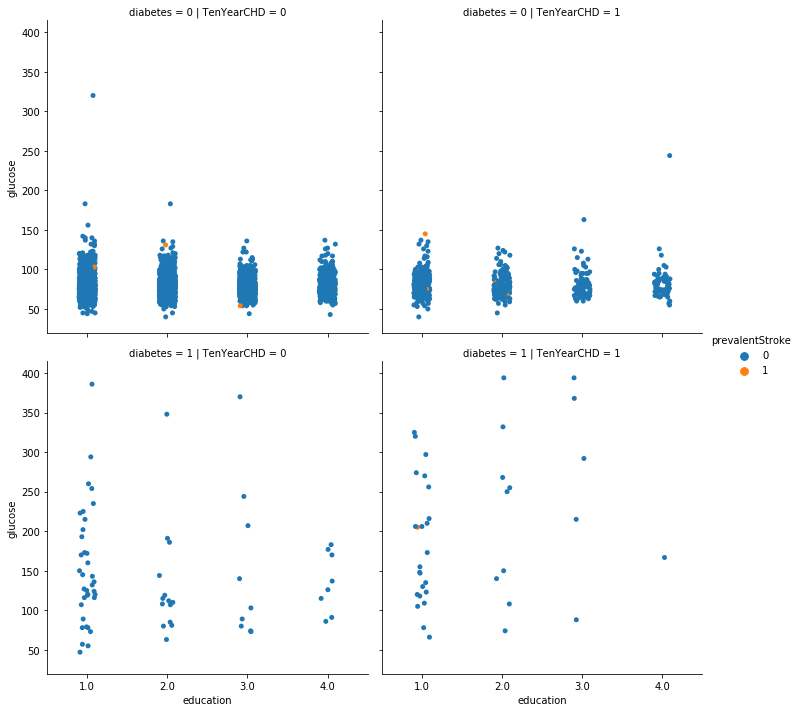

In [51]:
## MUltivariate 

sns.catplot(y="glucose",x="education",data=df2,col="TenYearCHD",row='diabetes',hue='prevalentStroke')

## Inferences:
1. Male patients have CHD mostly in the age of 35 to 55 whereas female patients have them later part of the life like 45 to 65 years. And female patients have less frequency then the other in these ages.
2. Patients who have diabetes have the risk of CHD mostly between the age of 35 to 50 and those who donot have the risk most in the age limit of 55 years. Those who have diabetes have a slight higher risk in these age limits.
3. Patients who take BP meds mostly are at the risk in the age limit of 55 to 65 years and those who donot have the danger in the in the age limit of 40 to 50 years.
4. The glucose level of a non-smoker and smoker has no diabetes and has no risk for CHD is seen between 50-100 and the same for person who is a smoker and non-smoker who has no diabetes and has a risk of CHD is seen between 75-125

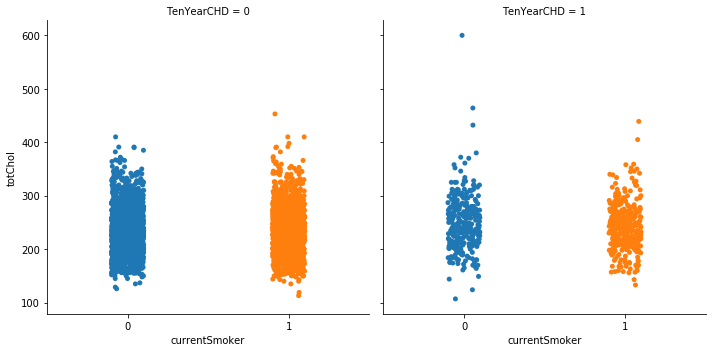

In [52]:
## multivariate analysis

sns.catplot(y="totChol",x="currentSmoker",data=df2,col="TenYearCHD")

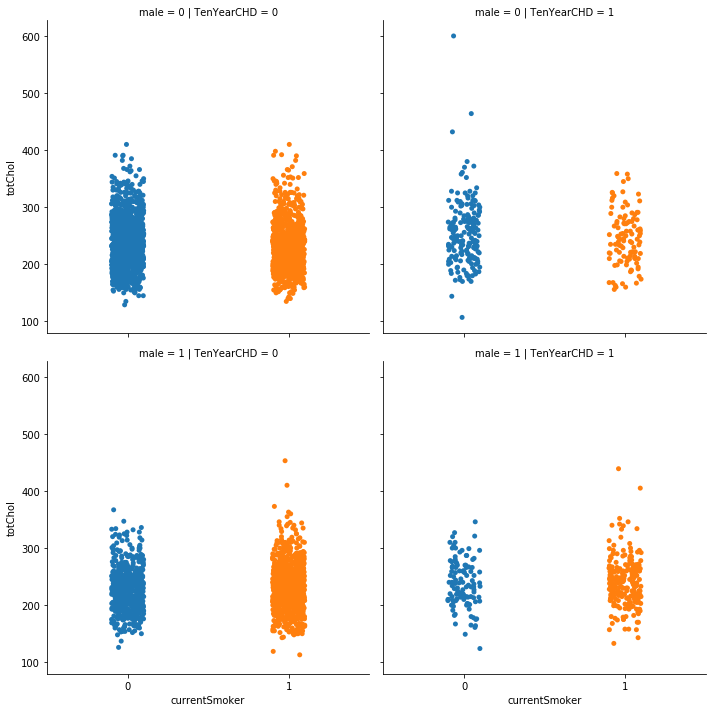

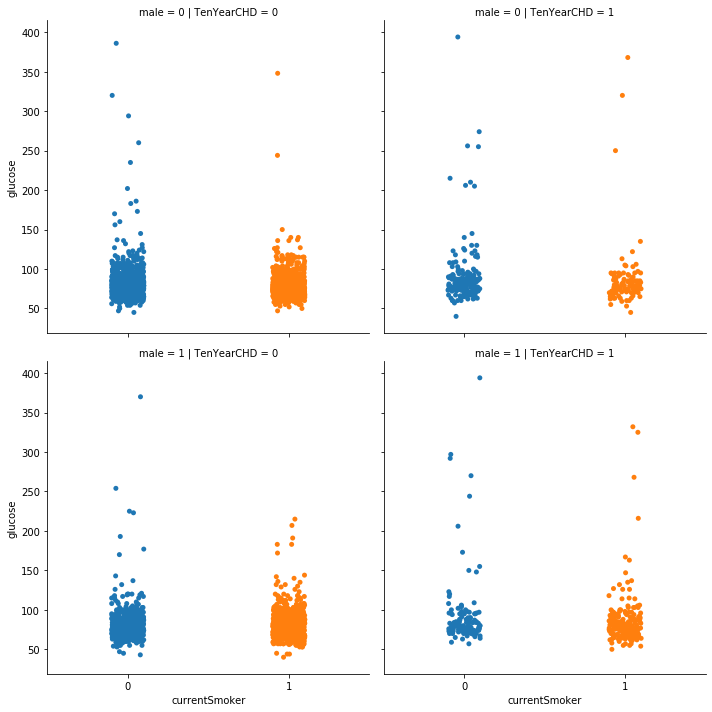

In [53]:
## multivariate analysis

sns.catplot(y="totChol",x="currentSmoker",data=df2,col="TenYearCHD",row='male')
sns.catplot(y="glucose",x="currentSmoker",data=df2,col="TenYearCHD",row='male')

## Inferences:
1. The risk of CHD is less if the patient is non smoker and male and they have a cholestrol and glucose level between 150 - 350 and 50 - 125 resp.
2. The risk of CHD is more if the patient is non smoker and male and they have a cholestrol and glucode level between 150 - 300 and 50 - 100 resp.
3. The cholestrol level seems to be high if he/she is a smoker and if he has no risk of CHD

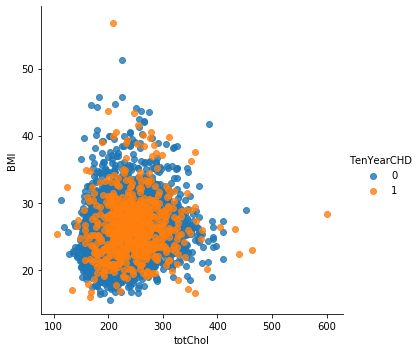

In [54]:
sns.lmplot("totChol","BMI",df2,hue="TenYearCHD",fit_reg=False)

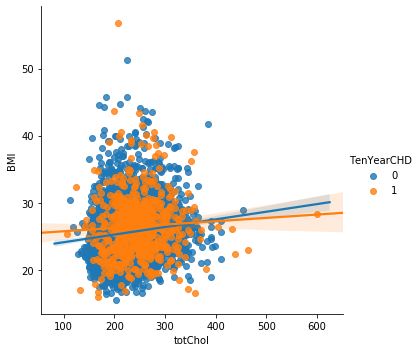

In [55]:
sns.lmplot("totChol","BMI",df2,hue="TenYearCHD",fit_reg=True)

# Inference
From the above graph, we can observe that male Current smokers are higher and Cigarettes consumed per day by them is also comparitively high. So, the risk factor for male to get heart disease is high.

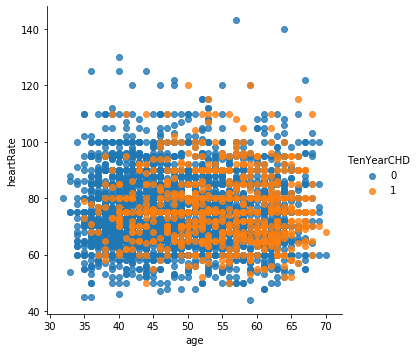

In [56]:
sns.lmplot("age","heartRate",df,hue="TenYearCHD",fit_reg=False)

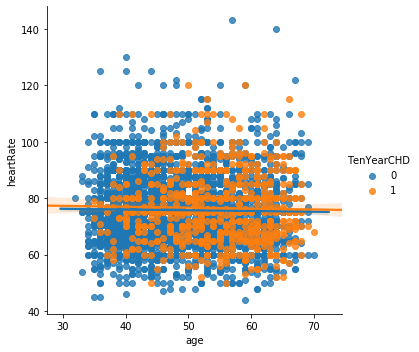

In [57]:
sns.lmplot("age","heartRate",df,hue="TenYearCHD",fit_reg=True)

## Inference
People with Higher healthy heart rates have lower chances to have heart disease.
People who are above the age 50 have high risks of having heart disease

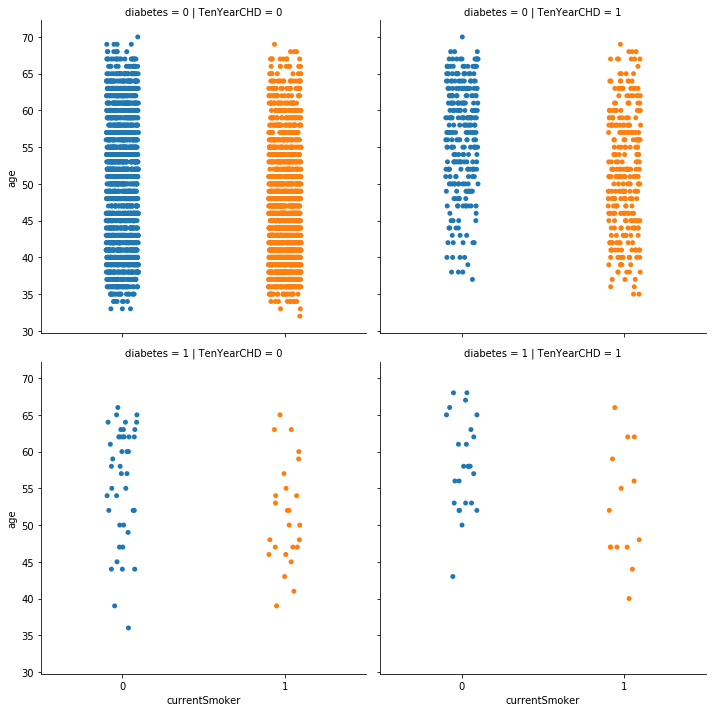

In [58]:
## MUltivariate 

sns.catplot(y="age",x="currentSmoker",data=df2,col="TenYearCHD",row='diabetes')

## Inferences:
People with no CHD as non-smokers, no diabetis and those who have the risk of CHD are usually smokers non-diabetic and range widely from the age 35 - 70. The other sections of people are less and scattered all around the age range.

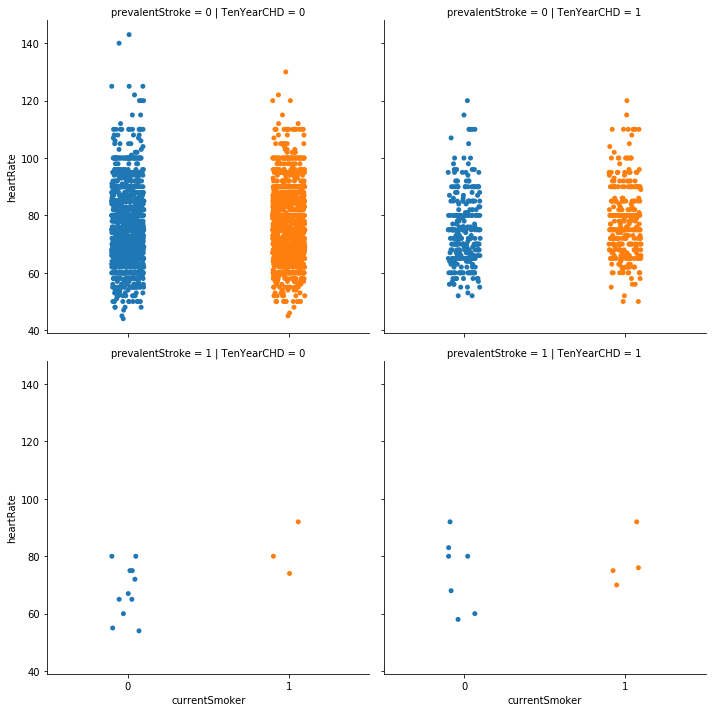

In [59]:
## MUltivariate 

sns.catplot(y="heartRate",x="currentSmoker",data=df2,col="TenYearCHD",row='prevalentStroke')

Number of people with CHD and with higher Heart Rate
 0    85
1    20
Name: TenYearCHD, dtype: int64


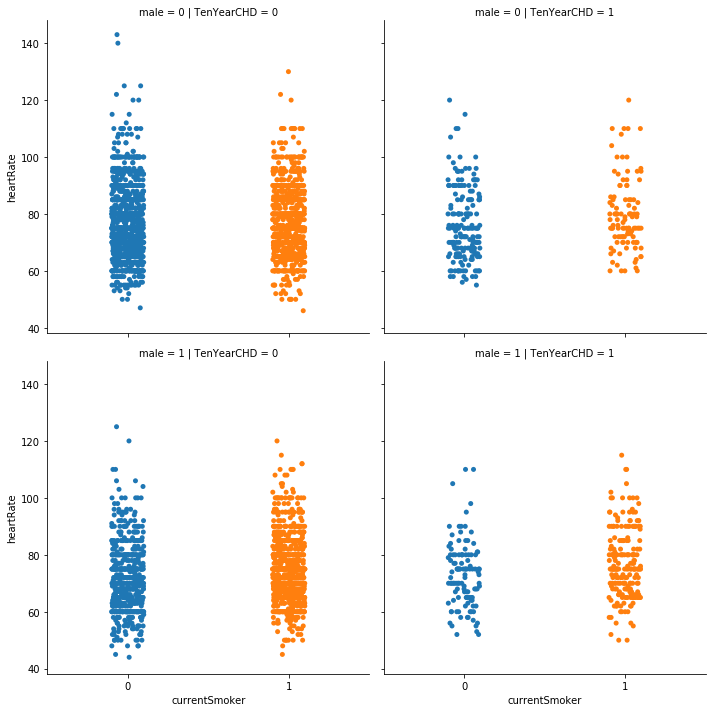

In [60]:
## MUltivariate 


sns.catplot(y="heartRate",x="currentSmoker",data=df2,col="TenYearCHD",row='male')
print("Number of people with CHD and with higher Heart Rate\n",df[df['heartRate']>100]['TenYearCHD'].value_counts())

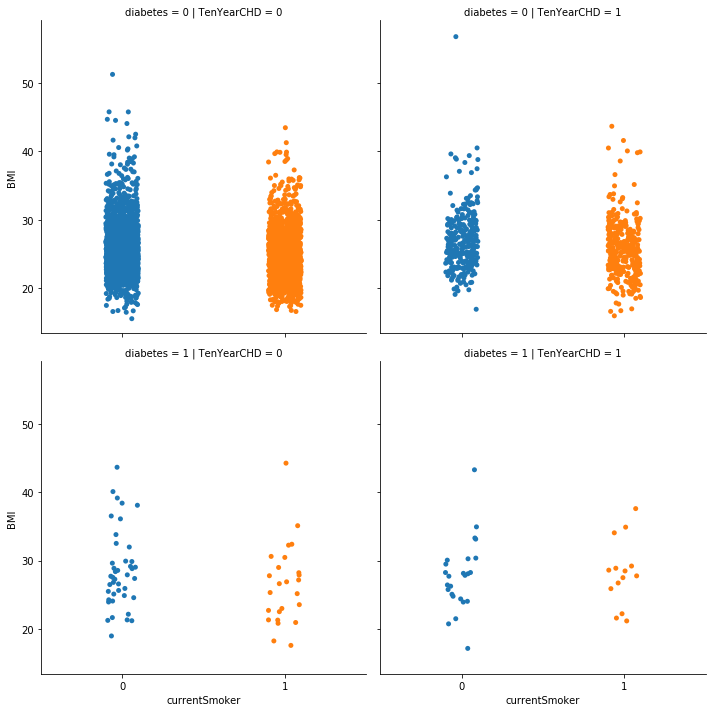

In [61]:
sns.catplot(y="BMI",x="currentSmoker",data=df2,col="TenYearCHD",row='diabetes')

## Inferences :
1. The patients with a HR of 40-100 and smokers/non-smokers also no prelevant stroke have less chance of CHD.
2. With a HR of 50-100 the risk of CHD is less.Smokers and females greater at risk who have a wide range of HR.
3. Non-smokers, non-diabetic who have less chance of CHD have a BMI of 20-35.

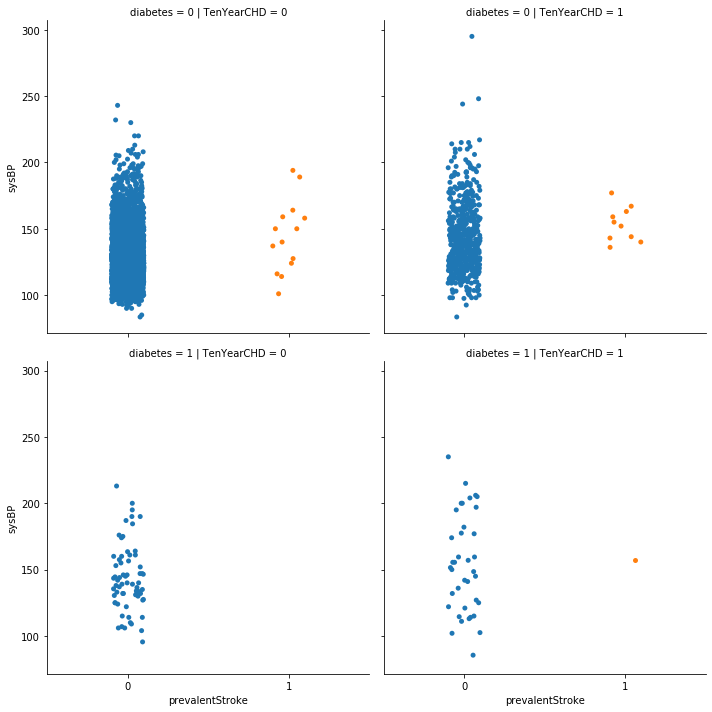

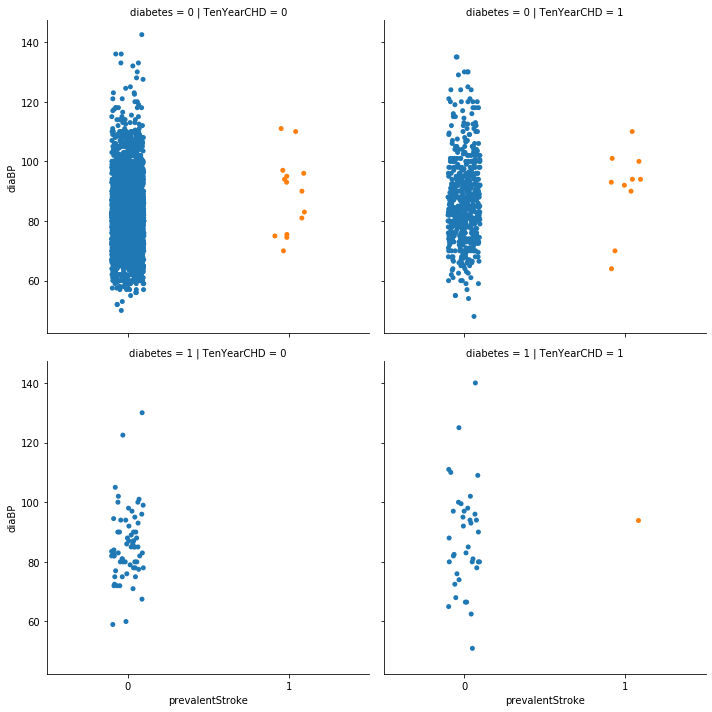

In [62]:
sns.catplot(y="sysBP",x="prevalentStroke",data=df2,col="TenYearCHD",row='diabetes')
sns.catplot(y="diaBP",x="prevalentStroke",data=df2,col="TenYearCHD",row='diabetes')

# Conclusions:
1. Women are slightly more proned to have heart dieseases with other health conditions than men although women are less in count have not having CHD then men as well. This slight indifference can be ignored.
2. Even though it seems heart disease is more frequent in people with lower level of education, it is not the whole truth. Number of sample in other levels is smaller. Hence, we need to another way to compare the relation. In fact it doesn't have much to do with CHDs.
3. Even though we think smokers are in big risk of CHD, data says the difference is not that big. By looking at rate, we can see that percantage differenc is only around 1%. Hence, smoking is not a very good attribute of CHD but cigsPerDay can be good predictor.
4. People on BP medicine is more likely to have CHD in future than people who do not need to take medicines now.
5. Diabetic patients are in more in risks than non-diabetic patients.
6. People with higher Cholesterol level is more likely to develop CHD in 10 years.
7. People with higher sysBP level is more likely to develop CHD in 10 years.
8. People with higher diaBP level is more likely to develop CHD in 10 years.
9. The data shows that both without CHD risk and with CHD risk is closer to being overweight in average. But without CHD risk people are close to normal BMI rate, which indicates BMI is a good indicator of health and CHD risk.
10. To sum up male/female, better/not better education who comsume more cigsPerday,on BP medicine, high cholestrol,sysBP and diaBP, and higher BMI have higher risk of CHD within the 10 yrs

### Feature Selection

In [63]:
X = df2.iloc[:,0:14] 
y = df2.iloc[:,-1] 

In [64]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [65]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))  

              Specs       Score
10            sysBP  727.667237
1               age  319.114310
9           totChol  232.140202
4        cigsPerDay  195.617583
11            diaBP  151.550717
7      prevalentHyp   92.061306
8          diabetes   38.412376
5            BPMeds   29.180966
0              male   16.692413
6   prevalentStroke   16.112384
12              BMI   13.986826


In [66]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,727.667237
1,age,319.114310
9,totChol,232.140202
4,cigsPerDay,195.617583
11,diaBP,151.550717
7,prevalentHyp,92.061306
8,diabetes,38.412376
5,BPMeds,29.180966
0,male,16.692413
6,prevalentStroke,16.112384


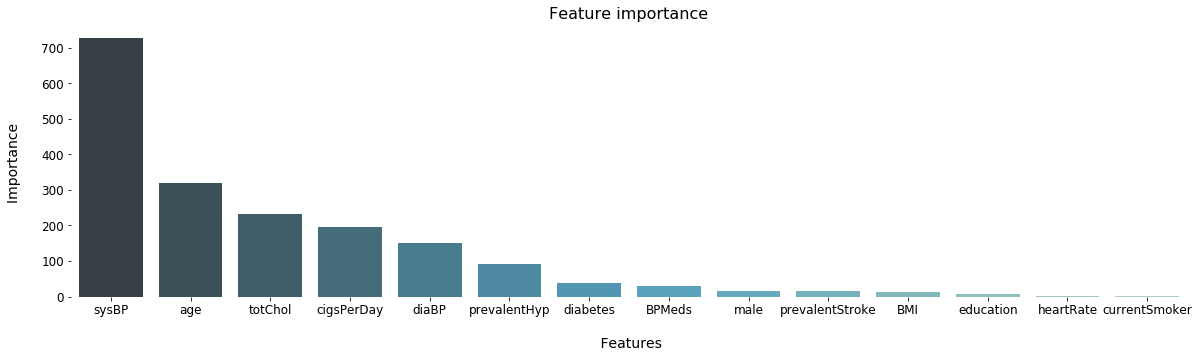

In [67]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [68]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'prevalentStroke']

In [69]:
df1 = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df1.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


### Removing the Outliers 

In [70]:
Q1 = df1['glucose'].quantile(0.25)
Q3 = df1['glucose'].quantile(0.75)
q1 = df1['totChol'].quantile(0.25)
q3 = df1['totChol'].quantile(0.75)
IQR = Q3 - Q1
iqr = q3 - q1
print(IQR)
print(iqr)
df_new = df1[~((df1['glucose'] < (Q1 - 1.5 * IQR)) |(df1['glucose'] > (Q3 + 1.5 * IQR)))]
df_new1 = df_new[~((df_new['totChol'] < (q1 - 1.5 * iqr)) |(df_new['totChol'] > (q3 + 1.5 * iqr)))]
df_new1.head()

16.0
57.0


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


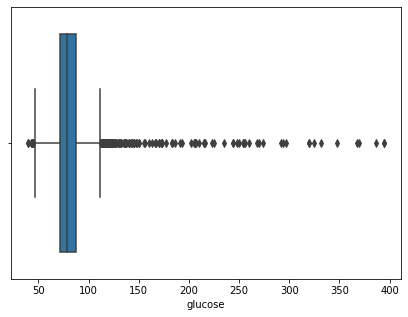

In [71]:
                    ### Before removing the Outliers : 

sns.boxplot(df.glucose)

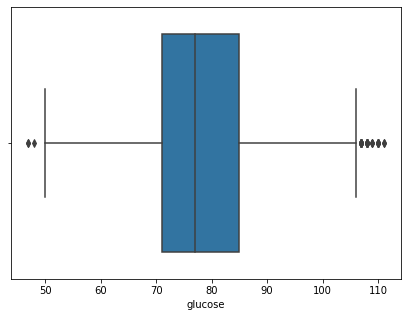

In [72]:
                        ### After removing the Outliers :


sns.boxplot(df_new1.glucose)

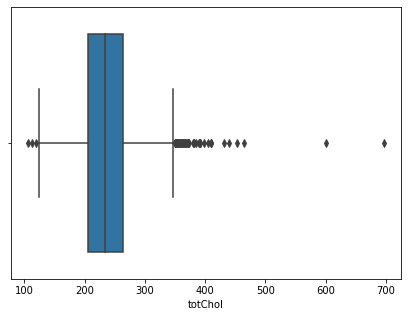

In [73]:
                        ### Before removing the Outliers :


sns.boxplot(df.totChol)

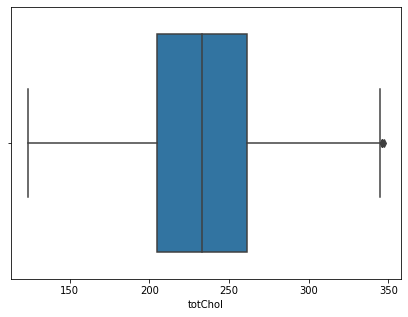

In [74]:
                        ### After removing the Outliers :


sns.boxplot(df_new1.totChol)

In [75]:
df_clean = df_new1

#### " df_clean " is the DataFrame with only Important Columns and with No-Null Values and Outliers   

In [76]:
scaler = MinMaxScaler(feature_range=(0,1)) 
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,0.227339,0.492077,0.456485,0.496233,0.129075,0.366839,0.298842,0.007553,0.039023,0.430514,0.143505
std,0.101483,0.171411,0.224939,0.182628,0.170843,0.124724,0.457808,0.086589,0.193674,0.495210,0.350631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153664,0.375000,0.263158,0.363229,0.000000,0.275132,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.210402,0.468750,0.421053,0.488789,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.278960,0.593750,0.631579,0.614350,0.285714,0.433862,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
        # DownSampling and Upsampling minority class

from sklearn.utils import resample
df_majority = df_scaled[df_scaled.TenYearCHD==0]
df_minority = df_scaled[df_scaled.TenYearCHD==1]
 
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     
                                 n_samples=2400,    # to match minority class
                                 random_state=123) 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=1800,    # to match majority class
                                 random_state=123)
# Combine majority and Minority class
df_upsampled = pd.concat([df_majority_upsampled, df_minority_upsampled])

X = df_upsampled.iloc[:,:-1]
y= df_upsampled.iloc[:,-1]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [79]:
print(len(X_test))
print(len(X_train))

840
3360


Class 0: 2400
Class 1: 1800
Proportion: 1.33 : 1


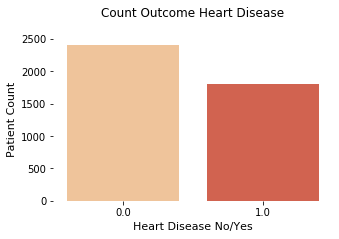

In [81]:
target_count = df_upsampled.TenYearCHD.value_counts()
plt.rcParams["figure.figsize"] = 5,3
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
sns.countplot(df_upsampled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Support Vector Machine

In [83]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [84]:
classifiers = [SVC()]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is: 70.00%


In [85]:
svm = SVC()
svm.fit(X_train, y_train)
normalized_df_svm_pred = svm.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [86]:
svm_acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(svm_acc,3)*100} % \n")

svm_f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(svm_f1,3)*100} % \n")

svm_recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(svm_recall,3)*100} % \n")

The accuracy score for SVM is: 70.0 % 

The f1 score for SVM is: 60.099999999999994 % 

The recall score for SVM is: 54.800000000000004 % 



Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

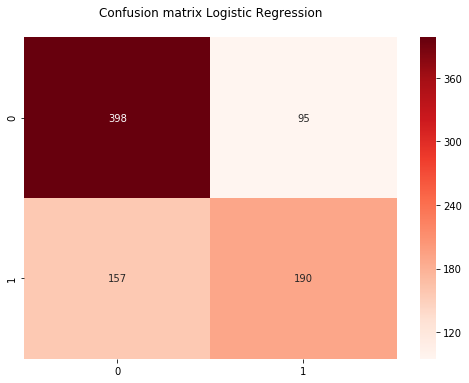

In [88]:
cnf_matrix_log = confusion_matrix(y_test, normalized_df_svm_pred)
plt.rcParams["figure.figsize"] = 7,5
ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
normalized_df_reg = LogisticRegression()
normalized_df_reg .fit(X_train, y_train)
normalized_df_reg_pred = normalized_df_reg.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
log_acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(log_acc,3)*100} % \n")

log_precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(log_precision,3)*100} % \n")

log_recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(log_recall,3)*100} % \n")

log_f1 = f1_score(y_test,normalized_df_reg_pred)
print(f"The fl score for LogReg is: {round(log_f1,3)*100} % \n")

The accuracy score for LogReg is: 70.19999999999999 % 

The precision score for LogReg is: 65.8 % 

The recall score for LogReg is: 58.199999999999996 % 

The fl score for LogReg is: 61.8 % 



Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

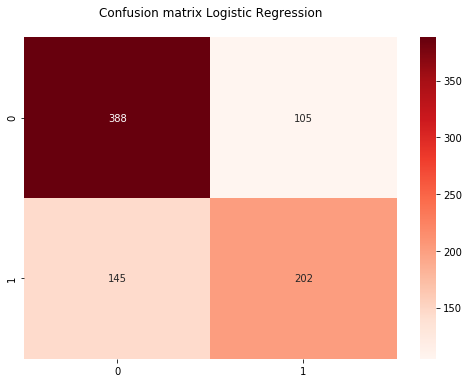

In [93]:
cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)
ax= plt.subplot()
plt.rcParams["figure.figsize"] = 7,5
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

# KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
list1=[]
max1=0
list2=range(99,1,-2)
for k_value in range(99,1,-2):
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train, y_train)
    normalized_df_knn_pred = knn.predict(X_test)
    f1 = f1_score(y_test, normalized_df_knn_pred)
    list1.append(f1*100)
    #max1=list1[0]
    if(f1>max1):
        max1=f1
value={'k-value':list2,'F1scores':list1}
kvalues = pd.DataFrame(value,columns=['k-value','F1scores'])
print('Max. F1 score: %.2f'%(max1*100),'%\n')
print("F1 scores for different values of K")
kvalues

Max. F1 score: 79.95 %

F1 scores for different values of K


,k-value,F1scores
0,99,61.897356
1,97,62.325581
2,95,62.208398
3,93,63.060278
4,91,62.928349
5,89,62.597809
6,87,62.382445
7,85,62.830482
8,83,61.852433
9,81,61.198738


In [96]:
normalized_df_knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, normalized_df_knn_pred)

print(f"The accuracy score for KNN is: {round(knn_acc,3)*100}%")

knn_f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(knn_f1,3)*100}%")

knn_recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(knn_recall,3)*100}%")

The accuracy score for KNN is: 81.8%
The f1 score for KNN is: 79.9%
The recall score for KNN is: 87.9%


In [97]:
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  81.78571428571428 %
The accuracy score of the training data is:  92.26 %


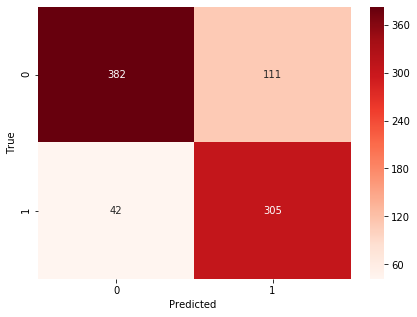

In [99]:
cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtc_up = DecisionTreeClassifier()
dtc_up.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
normalized_df_dtc_pred = dtc_up.predict(X_test)

In [106]:
dt_acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(dt_acc,3)*100}% \n")

dt_f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(dt_f1,3)*100}% \n")

dt_precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(dt_precision,3)*100}% \n")

dt_recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(dt_recall,3)*100}%")

The accuracy score for DTC is: 93.0% 

The f1 score for DTC is: 92.0% 

The precision score for DTC is: 86.7% 

The recall score for DTC is: 98.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

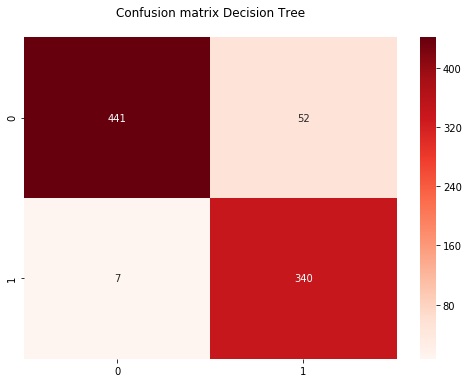

In [107]:

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

# Perform Cross Validation 

In [108]:

from sklearn.model_selection import cross_val_score

In [109]:
cv_results = cross_val_score(dtc_up, X, y, cv=5) 


In [110]:
print ("Cross-validated scores:", cv_results)

Cross-validated scores: [0.90357143 0.89404762 0.89761905 0.875      0.88452381]


In [111]:
print("The f1 score of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

The f1 score of Model with Cross Validation is: 89.10%


## Result :

In [112]:
scores = {'Model':['Logistic Regression','KNN','Decission Tree','Svm'],'F1-Score':['%0.2f'%(log_f1*100),'%0.2f'%(knn_f1*100),'%0.2f'%(dt_f1*100),'%0.2f'%(svm_f1*100)],'Accuracy':['%0.2f'%(log_acc*100),'%0.2f'%(knn_acc*100),'%0.2f'%(dt_acc*100),'%0.2f'%(svm_acc*100)],'Recall':['%0.2f'%(log_recall*100),'%0.2f'%(knn_recall*100),'%0.2f'%(dt_recall*100),'%0.2f'%(svm_recall*100)]}

Scores = pd.DataFrame(scores,columns=['Model','F1-Score','Accuracy','Recall'])
print("The Scores Obtained from the above applied Machine Learning Algorithms :")
Scores

The Scores Obtained from the above applied Machine Learning Algorithms :


,Model,F1-Score,Accuracy,Recall
0,Logistic Regression,61.77,70.24,58.21
1,KNN,79.95,81.79,87.90
2,Decission Tree,92.02,92.98,97.98
3,Svm,60.13,70.00,54.76


### Result: Decision Tree has the highest f1 score and it is clearly better to choose it for classification. Second choice would be to use KNN.

### Raghavendra K